In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras.backend as K
tf.keras.backend.set_image_data_format('channels_last')
path = 'F:\\Kaggle_base_dir\\base_dir\\train_dir'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(64,64), class_mode='categorical')

Using TensorFlow backend.


Found 25587 images belonging to 7 classes.


In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
type(train)


keras_preprocessing.image.directory_iterator.DirectoryIterator

In [6]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [7]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 64, 64, 3)
Batch Size for Output Image :  (32, 7)
Image Size of first image :  (64, 64, 3)
Output of first image :  (7,)


In [10]:
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B

img_input = layers.Input(shape=(64, 64, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Fourth convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
#x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
#x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

#optimizer = Adadelta(lr=0.001,rho=0.95,epsilon=1e-07)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer =SGD(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [11]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0   

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [13]:
val_path = 'F:\\Kaggle_base_dir\\base_dir\\test_dir\\val_dir'
val_datagen = ImageDataGenerator(rescale=1. / 255)
val = val_datagen.flow_from_directory(val_path, target_size=(64,64), class_mode='categorical')

Found 2003 images belonging to 7 classes.


In [14]:

#testing
path_test = 'F:\\Kaggle_base_dir\\base_dir\\test_dir\\testing_dir'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(64,64), class_mode='categorical')

Found 2003 images belonging to 7 classes.


In [11]:
#using additional layers
history=model.fit(train,epochs=5,validation_data=(val))

Epoch 1/5
800/800 [==============================] - 4749s 6s/step - loss: 1.4737 - acc: 0.3962 - val_loss: 1.2060 - val_acc: 0.5811
Epoch 2/5
800/800 [==============================] - 4761s 6s/step - loss: 1.1712 - acc: 0.5370 - val_loss: 0.8772 - val_acc: 0.6870
Epoch 3/5
800/800 [==============================] - 4751s 6s/step - loss: 1.0324 - acc: 0.5985 - val_loss: 0.8949 - val_acc: 0.6465
Epoch 4/5
800/800 [==============================] - 4739s 6s/step - loss: 0.9122 - acc: 0.6457 - val_loss: 0.8331 - val_acc: 0.6900
Epoch 5/5
800/800 [==============================] - 4753s 6s/step - loss: 0.8081 - acc: 0.6929 - val_loss: 0.8816 - val_acc: 0.6785


In [19]:
#using learning rate reduction
history=model.fit(train,epochs=5,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/5
800/800 [==============================] - 5473s 7s/step - loss: 1.5258 - acc: 0.3986 - val_loss: 1.1463 - val_acc: 0.5736
Epoch 2/5
800/800 [==============================] - 5561s 7s/step - loss: 1.2142 - acc: 0.5272 - val_loss: 1.0567 - val_acc: 0.6091
Epoch 3/5
800/800 [==============================] - 4884s 6s/step - loss: 1.1036 - acc: 0.5750 - val_loss: 0.9375 - val_acc: 0.6455
Epoch 4/5
800/800 [==============================] - 4563s 6s/step - loss: 1.0318 - acc: 0.6079 - val_loss: 0.9083 - val_acc: 0.6720
Epoch 5/5
800/800 [==============================] - 4546s 6s/step - loss: 0.9724 - acc: 0.6275 - val_loss: 0.8382 - val_acc: 0.6865


In [12]:
#using additional layers with learning rate reduction
history=model.fit(train,epochs=5,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/5
800/800 [==============================] - 4829s 6s/step - loss: 1.5443 - acc: 0.3761 - val_loss: 1.1108 - val_acc: 0.5512
Epoch 2/5
800/800 [==============================] - 4801s 6s/step - loss: 1.2009 - acc: 0.5231 - val_loss: 1.0054 - val_acc: 0.6191
Epoch 3/5
800/800 [==============================] - 4735s 6s/step - loss: 1.0731 - acc: 0.5842 - val_loss: 0.7788 - val_acc: 0.7059
Epoch 4/5
800/800 [==============================] - 4772s 6s/step - loss: 0.9824 - acc: 0.6214 - val_loss: 0.7676 - val_acc: 0.7089
Epoch 5/5
800/800 [==============================] - 4765s 6s/step - loss: 0.9178 - acc: 0.6455 - val_loss: 0.7591 - val_acc: 0.7144


In [22]:
#using resolution 64x64
history=model.fit(train,epochs=5,validation_data=(val))

Epoch 1/5
800/800 [==============================] - 701s 876ms/step - loss: 1.3284 - acc: 0.4690 - val_loss: 0.9424 - val_acc: 0.6500
Epoch 2/5
800/800 [==============================] - 626s 782ms/step - loss: 1.0252 - acc: 0.5997 - val_loss: 0.9314 - val_acc: 0.6510
Epoch 3/5
800/800 [==============================] - 635s 794ms/step - loss: 0.9171 - acc: 0.6441 - val_loss: 0.8764 - val_acc: 0.6735
Epoch 4/5
800/800 [==============================] - 641s 801ms/step - loss: 0.8200 - acc: 0.6878 - val_loss: 0.7542 - val_acc: 0.7259
Epoch 5/5
800/800 [==============================] - 637s 797ms/step - loss: 0.7429 - acc: 0.7144 - val_loss: 0.8222 - val_acc: 0.7000


In [11]:
#using additional layer and resolution 64x64
history=model.fit(train,epochs=5,validation_data=(val))

Epoch 1/5
800/800 [==============================] - 759s 949ms/step - loss: 1.3784 - acc: 0.4392 - val_loss: 0.8906 - val_acc: 0.6460
Epoch 2/5
800/800 [==============================] - 711s 889ms/step - loss: 1.0472 - acc: 0.5890 - val_loss: 0.7742 - val_acc: 0.7039
Epoch 3/5
800/800 [==============================] - 717s 897ms/step - loss: 0.9068 - acc: 0.6497 - val_loss: 0.8994 - val_acc: 0.6535
Epoch 4/5
800/800 [==============================] - 714s 893ms/step - loss: 0.8132 - acc: 0.6872 - val_loss: 0.7863 - val_acc: 0.7204
Epoch 5/5
800/800 [==============================] - 688s 860ms/step - loss: 0.7202 - acc: 0.7248 - val_loss: 0.8191 - val_acc: 0.6915


In [16]:
#using additional 2 layers and resolution 64x64
history=model.fit(train,epochs=5,validation_data=(val))

Epoch 1/5
800/800 [==============================] - 793s 992ms/step - loss: 1.4360 - acc: 0.4100 - val_loss: 1.0201 - val_acc: 0.5941
Epoch 2/5
800/800 [==============================] - 701s 877ms/step - loss: 1.0978 - acc: 0.5650 - val_loss: 1.0006 - val_acc: 0.5886
Epoch 3/5
800/800 [==============================] - 730s 912ms/step - loss: 0.9777 - acc: 0.6150 - val_loss: 0.9286 - val_acc: 0.6390
Epoch 4/5
800/800 [==============================] - 693s 867ms/step - loss: 0.8736 - acc: 0.6649 - val_loss: 0.8530 - val_acc: 0.6705
Epoch 5/5
800/800 [==============================] - 698s 872ms/step - loss: 0.7904 - acc: 0.6955 - val_loss: 0.8053 - val_acc: 0.6985


In [20]:
#using lr=0.0001
history=model.fit(train,epochs=5,validation_data=(val))

Epoch 1/5
800/800 [==============================] - 843s 1s/step - loss: 1.6008 - acc: 0.3547 - val_loss: 1.1129 - val_acc: 0.5487
Epoch 2/5
800/800 [==============================] - 682s 853ms/step - loss: 1.2358 - acc: 0.5071 - val_loss: 1.1808 - val_acc: 0.5532
Epoch 3/5
800/800 [==============================] - 671s 838ms/step - loss: 1.1409 - acc: 0.5516 - val_loss: 1.0196 - val_acc: 0.6256
Epoch 4/5
800/800 [==============================] - 690s 862ms/step - loss: 1.0599 - acc: 0.5859 - val_loss: 0.9067 - val_acc: 0.6660
Epoch 5/5
800/800 [==============================] - 689s 862ms/step - loss: 0.9979 - acc: 0.6098 - val_loss: 1.0338 - val_acc: 0.6151


In [29]:
#using lr=0.01
history=model.fit(train,epochs=5,validation_data=(val))

Epoch 1/5
800/800 [==============================] - 681s 851ms/step - loss: 1.9547 - acc: 0.1527 - val_loss: 1.8266 - val_acc: 0.6695
Epoch 2/5
800/800 [==============================] - 677s 846ms/step - loss: 1.9408 - acc: 0.1540 - val_loss: 1.8660 - val_acc: 0.6695
Epoch 3/5
800/800 [==============================] - 686s 857ms/step - loss: 1.9410 - acc: 0.1533 - val_loss: 1.8226 - val_acc: 0.6695
Epoch 4/5
800/800 [==============================] - 696s 870ms/step - loss: 1.9411 - acc: 0.1534 - val_loss: 1.8790 - val_acc: 0.0330
Epoch 5/5
800/800 [==============================] - 678s 848ms/step - loss: 1.9410 - acc: 0.1529 - val_loss: 1.8780 - val_acc: 0.0330


In [12]:
#using learning rate reduction and res 64x64
history=model.fit(train,epochs=5,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/5
800/800 [==============================] - 706s 883ms/step - loss: 1.3963 - acc: 0.4364 - val_loss: 0.9984 - val_acc: 0.6181
Epoch 2/5
800/800 [==============================] - 648s 810ms/step - loss: 1.0679 - acc: 0.5779 - val_loss: 0.8427 - val_acc: 0.6785
Epoch 3/5
800/800 [==============================] - 639s 799ms/step - loss: 0.9470 - acc: 0.6323 - val_loss: 0.7476 - val_acc: 0.7149
Epoch 4/5
800/800 [==============================] - 634s 793ms/step - loss: 0.8383 - acc: 0.6726 - val_loss: 0.7695 - val_acc: 0.7069
Epoch 5/5
800/800 [==============================] - 627s 783ms/step - loss: 0.7447 - acc: 0.7120 - val_loss: 0.7520 - val_acc: 0.7164


In [12]:
#using learning rate reduction,one additional layer and res 64x64,epochs=20
history=model.fit(train,epochs=20,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/20
800/800 [==============================] - 714s 892ms/step - loss: 1.3419 - acc: 0.4580 - val_loss: 0.9048 - val_acc: 0.6360
Epoch 2/20
800/800 [==============================] - 639s 799ms/step - loss: 1.0165 - acc: 0.6010 - val_loss: 0.7939 - val_acc: 0.6850
Epoch 3/20
800/800 [==============================] - 617s 771ms/step - loss: 0.8755 - acc: 0.6629 - val_loss: 0.8977 - val_acc: 0.6585
Epoch 4/20
800/800 [==============================] - 637s 797ms/step - loss: 0.7803 - acc: 0.6968 - val_loss: 0.7937 - val_acc: 0.6965
Epoch 5/20
800/800 [==============================] - 651s 814ms/step - loss: 0.6927 - acc: 0.7333 - val_loss: 0.7944 - val_acc: 0.7129
Epoch 6/20
800/800 [==============================] - 672s 840ms/step - loss: 0.6238 - acc: 0.7598 - val_loss: 0.7959 - val_acc: 0.7119
Epoch 7/20
800/800 [==============================] - 704s 880ms/step - loss: 0.5749 - acc: 0.7791 - val_loss: 0.8316 - val_acc: 0.7344
Epoch 8/20
800/800 [============================

In [15]:
#using learning rate reduction,one additional layer and res 64x64,epochs=50
history=model.fit(train,epochs=50,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/50
800/800 [==============================] - 868s 1s/step - loss: 1.4207 - acc: 0.4197 - val_loss: 0.9814 - val_acc: 0.6311
Epoch 2/50
800/800 [==============================] - 753s 941ms/step - loss: 1.0878 - acc: 0.5699 - val_loss: 0.9572 - val_acc: 0.6455
Epoch 3/50
800/800 [==============================] - 744s 930ms/step - loss: 0.9590 - acc: 0.6277 - val_loss: 0.8743 - val_acc: 0.6740
Epoch 4/50
800/800 [==============================] - 745s 931ms/step - loss: 0.8638 - acc: 0.6643 - val_loss: 0.8315 - val_acc: 0.6805
Epoch 5/50
800/800 [==============================] - 750s 938ms/step - loss: 0.7722 - acc: 0.7013 - val_loss: 0.8360 - val_acc: 0.6890
Epoch 6/50
800/800 [==============================] - 777s 971ms/step - loss: 0.6958 - acc: 0.7328 - val_loss: 0.8322 - val_acc: 0.6945
Epoch 7/50
800/800 [==============================] - 743s 929ms/step - loss: 0.6178 - acc: 0.7631 - val_loss: 0.8327 - val_acc: 0.7064
Epoch 8/50
800/800 [==============================]

In [16]:
# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

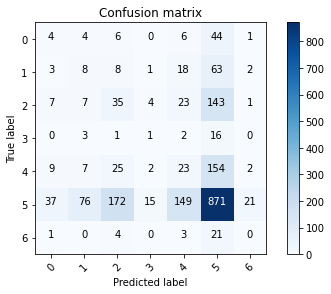

In [23]:
def plot_confusion_matrix2(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# plot the confusion matrix
plot_confusion_matrix2(cm1, classes = range(7))

63/63 [==============================] - 93s 1s/step


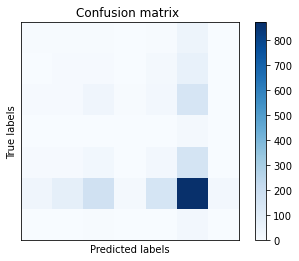

Confusion: [[  4   4   6   0   6  44   1]
 [  3   8   8   1  18  63   2]
 [  7   7  35   4  23 143   1]
 [  0   3   1   1   2  16   0]
 [  9   7  25   2  23 154   2]
 [ 37  76 172  15 149 871  21]
 [  1   0   4   0   3  21   0]]
Accuracy :  0.005991013479780329
Accuracy 2: 0.4702945581627559
Sensitivity :  0.5
Specificity :  0.7272727272727273
Recall [0.06153846 0.0776699  0.15909091 0.04347826 0.1036036  0.64951529
 0.        ]
Precision [0.06557377 0.07619048 0.13944223 0.04347826 0.10267857 0.66387195
 0.        ]
F1 [0.06349206 0.07692308 0.14861996 0.04347826 0.10313901 0.65661515
 0.        ]


In [17]:
predictions = model.predict(test,verbose=1)  #for confusion metric
#6
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
test_labels=test.classes
cm1=confusion_matrix(test_labels, predictions.argmax(axis=1))
# or
#cm = np.array([[1401,    0],[1112, 0]])
cm1_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']
plt.imshow(cm1, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# Accuracy
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(test_labels, predictions.argmax(axis=1))
# Recall
from sklearn.metrics import recall_score
RecallScore=recall_score(test_labels, predictions.argmax(axis=1), average=None)
# Precision
from sklearn.metrics import precision_score
Precision=precision_score(test_labels, predictions.argmax(axis=1), average=None)
from sklearn.metrics import f1_score
F1=f1_score(test_labels, predictions.argmax(axis=1), average=None)
total1=sum(sum(cm1))
print("Confusion:",cm1)
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
print("Accuracy 2:",Accuracy)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("Recall",RecallScore)
print("Precision",Precision)
print("F1",F1)

In [18]:
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))
model.save("model50.h5")

63/63 [==============================] - 56s 889ms/step
Loss = 1.6444172475317747
Test Accuracy = 0.7493759363636754
63/63 [==============================] - 64s 1s/step
Loss = 1.8016745156189589
Validation Accuracy = 0.7513729404998433


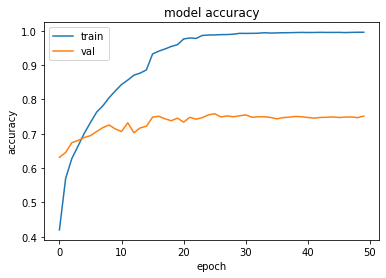

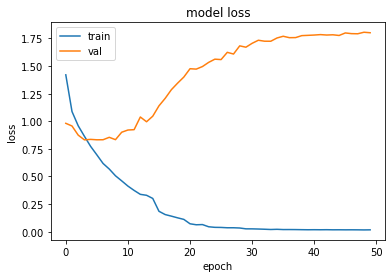

In [20]:
#with epochs 50
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#with epochs 7
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Text(0, 0.5, 'Fraction classified incorrectly')

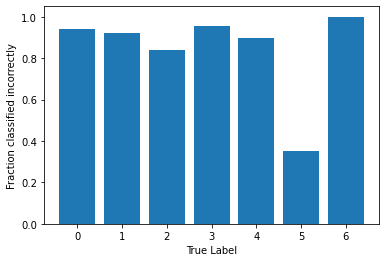

In [21]:
label_frac_error = 1 - np.diag(cm1) / np.sum(cm1, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

Text(0, 0.5, 'Fraction classified correctly')

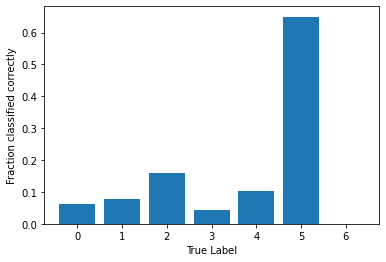

In [22]:
label_frac =  np.diag(cm1) / np.sum(cm1, axis=1)
plt.bar(np.arange(7),label_frac)
plt.xlabel('True Label')
plt.ylabel('Fraction classified correctly')

In [17]:
#using learning rate reduction and res 64x64,epochs=10
history=model.fit(train,epochs=10,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/10
800/800 [==============================] - 702s 878ms/step - loss: 1.3657 - acc: 0.4479 - val_loss: 0.9655 - val_acc: 0.6425
Epoch 2/10
800/800 [==============================] - 686s 858ms/step - loss: 1.0278 - acc: 0.5974 - val_loss: 1.0427 - val_acc: 0.6196
Epoch 3/10
800/800 [==============================] - 694s 867ms/step - loss: 0.9013 - acc: 0.6510 - val_loss: 0.8056 - val_acc: 0.6935
Epoch 4/10
800/800 [==============================] - 678s 848ms/step - loss: 0.7953 - acc: 0.6975 - val_loss: 0.7850 - val_acc: 0.7000
Epoch 5/10
800/800 [==============================] - 710s 887ms/step - loss: 0.7265 - acc: 0.7243 - val_loss: 0.7842 - val_acc: 0.7244
Epoch 6/10
800/800 [==============================] - 686s 857ms/step - loss: 0.6542 - acc: 0.7524 - val_loss: 0.7933 - val_acc: 0.7099
Epoch 7/10
800/800 [==============================] - 708s 885ms/step - loss: 0.5850 - acc: 0.7756 - val_loss: 0.7764 - val_acc: 0.7234
Epoch 8/10
800/800 [============================

In [51]:
#using learning rate reduction and res 64x64,epochs=8,optimizer=adadelta
history=model.fit(train,epochs=8,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/8
800/800 [==============================] - 801s 1s/step - loss: 1.9425 - acc: 0.1541 - val_loss: 1.9450 - val_acc: 0.1103
Epoch 2/8
800/800 [==============================] - 725s 906ms/step - loss: 1.9409 - acc: 0.1576 - val_loss: 1.9408 - val_acc: 0.0714
Epoch 3/8
800/800 [==============================] - 726s 908ms/step - loss: 1.9396 - acc: 0.1560 - val_loss: 1.9378 - val_acc: 0.0544
Epoch 4/8
800/800 [==============================] - 727s 909ms/step - loss: 1.9387 - acc: 0.1598 - val_loss: 1.9344 - val_acc: 0.0544

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/8
800/800 [==============================] - 723s 903ms/step - loss: 1.9380 - acc: 0.1640 - val_loss: 1.9330 - val_acc: 0.0539
Epoch 6/8
800/800 [==============================] - 717s 897ms/step - loss: 1.9374 - acc: 0.1675 - val_loss: 1.9318 - val_acc: 0.0534
Epoch 7/8
800/800 [==============================] - 713s 892ms/step - loss: 1.9361 - acc: 0.1702 - val_loss: 1.

In [17]:
#using epochs=7,batch_size=64
history=model.fit(train,batch_size=64,epochs=7,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/7
800/800 [==============================] - 710s 888ms/step - loss: 1.4193 - acc: 0.4138 - val_loss: 0.9647 - val_acc: 0.6485
Epoch 2/7
800/800 [==============================] - 714s 892ms/step - loss: 1.1068 - acc: 0.5628 - val_loss: 0.8631 - val_acc: 0.6730
Epoch 3/7
800/800 [==============================] - 713s 891ms/step - loss: 0.9897 - acc: 0.6150 - val_loss: 0.8113 - val_acc: 0.6965
Epoch 4/7
800/800 [==============================] - 716s 895ms/step - loss: 0.8992 - acc: 0.6496 - val_loss: 0.9807 - val_acc: 0.6171
Epoch 5/7
800/800 [==============================] - 722s 903ms/step - loss: 0.8310 - acc: 0.6749 - val_loss: 0.7897 - val_acc: 0.7139
Epoch 6/7
800/800 [==============================] - 731s 914ms/step - loss: 0.7793 - acc: 0.6969 - val_loss: 0.8668 - val_acc: 0.6665
Epoch 7/7
800/800 [==============================] - 703s 879ms/step - loss: 0.7360 - acc: 0.7142 - val_loss: 0.8535 - val_acc: 0.6820


In [15]:
#using learning rate=0.001 and res 64x64,epochs=7,batch_size=32,optimizer=SGD
history=model.fit(train,epochs=8,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/8
800/800 [==============================] - 802s 1s/step - loss: 1.9432 - acc: 0.1517 - val_loss: 1.9383 - val_acc: 0.0330
Epoch 2/8
800/800 [==============================] - 744s 930ms/step - loss: 1.9376 - acc: 0.1711 - val_loss: 1.9088 - val_acc: 0.0999
Epoch 3/8
800/800 [==============================] - 749s 936ms/step - loss: 1.9341 - acc: 0.1883 - val_loss: 1.8969 - val_acc: 0.2356
Epoch 4/8
800/800 [==============================] - 715s 893ms/step - loss: 1.9300 - acc: 0.2111 - val_loss: 1.8830 - val_acc: 0.4348
Epoch 5/8
800/800 [==============================] - 735s 918ms/step - loss: 1.9232 - acc: 0.2281 - val_loss: 1.8682 - val_acc: 0.4433
Epoch 6/8
800/800 [==============================] - 747s 934ms/step - loss: 1.9134 - acc: 0.2425 - val_loss: 1.8444 - val_acc: 0.4713
Epoch 7/8
800/800 [==============================] - 715s 893ms/step - loss: 1.8981 - acc: 0.2542 - val_loss: 1.7762 - val_acc: 0.4918
Epoch 8/8
800/800 [==============================] - 742s 

In [15]:
#res 200x200
history=model.fit(train,epochs=10,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/15
800/800 [==============================] - 3794s 5s/step - loss: 1.3312 - acc: 0.4693 - val_loss: 1.1745 - val_acc: 0.5691
Epoch 2/15
800/800 [==============================] - 3745s 5s/step - loss: 1.0257 - acc: 0.6005 - val_loss: 0.9104 - val_acc: 0.6560
Epoch 3/15
800/800 [==============================] - 3794s 5s/step - loss: 0.8639 - acc: 0.6696 - val_loss: 0.8071 - val_acc: 0.7000
Epoch 4/15
800/800 [==============================] - 3751s 5s/step - loss: 0.7401 - acc: 0.7156 - val_loss: 0.8664 - val_acc: 0.6745
Epoch 5/15
800/800 [==============================] - 3732s 5s/step - loss: 0.6420 - acc: 0.7561 - val_loss: 0.8267 - val_acc: 0.6875
Epoch 6/15
800/800 [==============================] - 3743s 5s/step - loss: 0.5488 - acc: 0.7927 - val_loss: 0.8308 - val_acc: 0.7134
Epoch 7/15
800/800 [==============================] - 4267s 5s/step - loss: 0.4718 - acc: 0.8249 - val_loss: 0.9000 - val_acc: 0.7219
Epoch 8/15
800/800 [==============================] - 3735s 5s

KeyboardInterrupt: 

In [13]:
#using learning rate reduction and res 64x64,epochs=20
history=model.fit(train,epochs=20,validation_data=(val),callbacks=[learning_rate_reduction])

Epoch 1/20
800/800 [==============================] - 873s 1s/step - loss: 1.3422 - acc: 0.4656 - val_loss: 0.9658 - val_acc: 0.6326
Epoch 2/20
800/800 [==============================] - 696s 870ms/step - loss: 1.0476 - acc: 0.5881 - val_loss: 0.9750 - val_acc: 0.6181
Epoch 3/20
800/800 [==============================] - 698s 872ms/step - loss: 0.9119 - acc: 0.6468 - val_loss: 0.9572 - val_acc: 0.6161
Epoch 4/20
800/800 [==============================] - 693s 867ms/step - loss: 0.8217 - acc: 0.6842 - val_loss: 0.9673 - val_acc: 0.6470
Epoch 5/20
800/800 [==============================] - 709s 886ms/step - loss: 0.7474 - acc: 0.7141 - val_loss: 0.8604 - val_acc: 0.6645
Epoch 6/20
800/800 [==============================] - 703s 879ms/step - loss: 0.6732 - acc: 0.7420 - val_loss: 0.8189 - val_acc: 0.6970
Epoch 7/20
800/800 [==============================] - 694s 867ms/step - loss: 0.6277 - acc: 0.7605 - val_loss: 0.8304 - val_acc: 0.7134
Epoch 8/20
800/800 [==============================]

In [12]:
#original model res 227x227 with input shape=227x227x3
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel.h5")

63/63 [==============================] - 144s 2s/step
Loss = 0.9376763094084536
Test Accuracy = 0.6435346979233127


In [13]:
#After adding layers to the model(res 227x227 with input shape=227x227x3)
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel.h5")

63/63 [==============================] - 203s 3s/step
Loss = 0.8497415811373957
Test Accuracy = 0.6804792811974132


In [21]:
#After adding learning rate reduction to the model(res 227x227 with input shape=227x227x3)
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel2.h5")

63/63 [==============================] - 145s 2s/step
Loss = 0.829549308306446
Test Accuracy = 0.6904643036637137


In [13]:
#After adding additional layers and learning rate reduction to the model(res 227x227 with input shape=227x227x3)
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel3.h5")

63/63 [==============================] - 155s 2s/step
Loss = 0.7381835208198635
Test Accuracy = 0.7114328508429448


In [23]:
#After making resolution 64x64(input shape=64x64x3)
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel4.h5")

63/63 [==============================] - 80s 1s/step
Loss = 0.7732071680125152
Test Accuracy = 0.7039440837849157


In [24]:
preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))


preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

800/800 [==============================] - 522s 652ms/step
Loss = 0.5908625448111628
Train Accuracy = 0.7735568843436893
63/63 [==============================] - 75s 1s/step
Loss = 0.8222408749672752
Validation Accuracy = 0.6999500747983954


In [12]:
#res 64x64 and layer
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel5.h5")

63/63 [==============================] - 94s 1s/step
Loss = 0.7654281664775481
Test Accuracy = 0.7109335997196299


In [13]:
preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

800/800 [==============================] - 609s 761ms/step
Loss = 0.5836483474753734
Train Accuracy = 0.778520342354367
63/63 [==============================] - 78s 1s/step
Loss = 0.8190632267588683
Validation Accuracy = 0.6914628055532516


In [17]:
#res 64x64 and 2 layers
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel6.h5")

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 90s 1s/step
Loss = 0.769958498742184
Test Accuracy = 0.7014478280195521
800/800 [==============================] - 606s 757ms/step
Loss = 0.654131933370611
Train Accuracy = 0.7523742525547821
63/63 [==============================] - 79s 1s/step
Loss = 0.805344389012261
Validation Accuracy = 0.6984523216367542


In [21]:
#res 64x64 and lr=0.0001 with 1 additional layer
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 86s 1s/step
Loss = 1.0174587926921759
Test Accuracy = 0.5986020969588698
800/800 [==============================] - 601s 751ms/step
Loss = 0.9457063404007143
Train Accuracy = 0.6325477781779192
63/63 [==============================] - 77s 1s/step
Loss = 1.0337580593597633
Validation Accuracy = 0.61507738410266


In [30]:
#res 64x64 and lr=0.01 with 1 additional layer
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 87s 1s/step
Loss = 1.8783295696161415
Test Accuracy = 0.032451323019196496
800/800 [==============================] - 593s 742ms/step
Loss = 1.940639707814507
Train Accuracy = 0.15515691561655492
63/63 [==============================] - 76s 1s/step
Loss = 1.8780318330778103
Validation Accuracy = 0.032950574138791815


In [13]:
#res 64x64 and lr reduction with 1 additional layer
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel7.h5")

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 84s 1s/step
Loss = 0.7403188546002655
Test Accuracy = 0.7169246129911063
800/800 [==============================] - 543s 679ms/step
Loss = 0.6481208803715495
Train Accuracy = 0.7455348419049199
63/63 [==============================] - 77s 1s/step
Loss = 0.7520092965005578
Validation Accuracy = 0.7164253621356105


In [13]:
#res 64x64 and lr reduction with 1 additional layer and epochs=20
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel8.h5")

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 78s 1s/step
Loss = 1.2309221189377966
Test Accuracy = 0.7533699453501956
800/800 [==============================] - 583s 728ms/step
Loss = 0.02347335406040856
Train Accuracy = 0.9957009418845507
63/63 [==============================] - 77s 1s/step
Loss = 1.353706168342815
Validation Accuracy = 0.745881178143378


Text(0.5, 1.0, 'Training and validation loss')

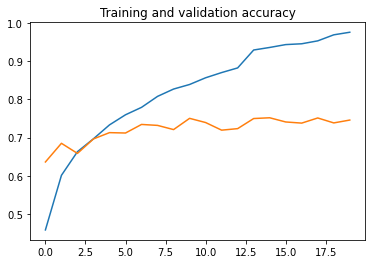

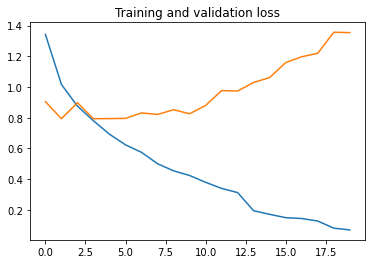

In [14]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [19]:
#res 64x64 with lr reduction and epochs=10
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel9.h5")

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 71s 1s/step
Loss = 0.7589210171254349
Test Accuracy = 0.7363954070086962
800/800 [==============================] - 596s 745ms/step
Loss = 0.2496890701167482
Train Accuracy = 0.9149958963699235
63/63 [==============================] - 77s 1s/step
Loss = 0.8753023774279872
Validation Accuracy = 0.7254118820874619


Text(0.5, 1.0, 'Training and validation loss')

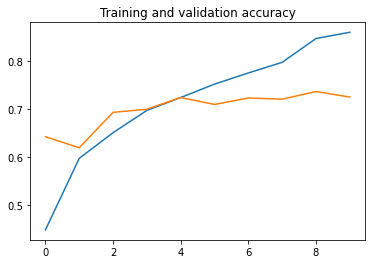

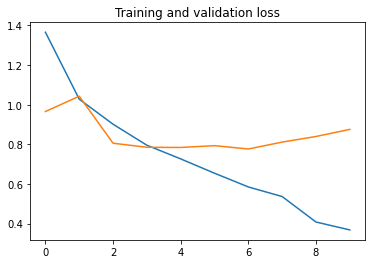

In [20]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [18]:
#res 64x64, epochs=8, batch_size=64
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel10.h5")

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 82s 1s/step
Loss = 0.8290021962305336
Test Accuracy = 0.6999500748579108
800/800 [==============================] - 618s 773ms/step
Loss = 0.664186046593782
Train Accuracy = 0.7419392660218852
63/63 [==============================] - 88s 1s/step
Loss = 0.8535366558278732
Validation Accuracy = 0.6819770343590544


In [16]:
#res 64x64, lr =0.001, epochs=8, optimiser=SGD
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 107s 2s/step
Loss = 1.7503869382964927
Test Accuracy = 0.5012481275702261
800/800 [==============================] - 695s 869ms/step
Loss = 1.8549056660086785
Train Accuracy = 0.3078516434033525
63/63 [==============================] - 94s 1s/step
Loss = 1.7537303945152865
Validation Accuracy = 0.5042436343101162


In [52]:
#res 64x64, lr =0.001, epochs=8, optimiser=Adadelta
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 93s 1s/step
Loss = 1.930074174821942
Test Accuracy = 0.05192211683220228
800/800 [==============================] - 650s 813ms/step
Loss = 1.9353098103341033
Train Accuracy = 0.1777074295610589
63/63 [==============================] - 84s 1s/step
Loss = 1.929895028494265
Validation Accuracy = 0.05292061907883233


In [16]:
#res 200x200(input shape=64x64x3), lr =0.001 and epochs=10
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel11.h5")

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 130s 2s/step
Loss = 0.9742025939809996
Test Accuracy = 0.7139291061024278
800/800 [==============================] - 1416s 2s/step
Loss = 0.18555590349604462
Train Accuracy = 0.9409465744323289
63/63 [==============================] - 128s 2s/step
Loss = 1.0604962526531858
Validation Accuracy = 0.7024463304744859


In [14]:
#res 64x64 with lr reduction and epochs=20
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
model.save("NewCNNmodel12.h5")

preds = model.evaluate(train)
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(val)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

63/63 [==============================] - 90s 1s/step
Loss = 1.1189034793951842
Test Accuracy = 0.7438841735013294
800/800 [==============================] - 646s 808ms/step
Loss = 0.03732268889728188
Train Accuracy = 0.9931996717082894
63/63 [==============================] - 84s 1s/step
Loss = 1.292236116696642
Validation Accuracy = 0.7348976534304473


Text(0.5, 1.0, 'Training and validation loss')

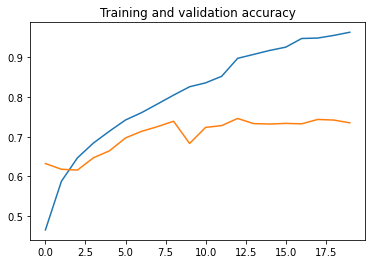

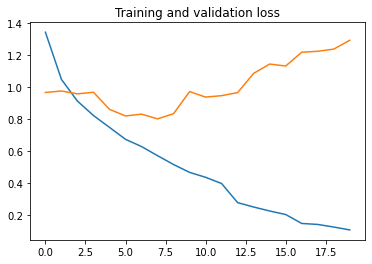

In [15]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')